# Un crime 

In [84]:
import pandas as pd

import numpy as np
import csv
import os

I started this project  to make it part of my data-science portafolio. The skills i want to show is my knowledege in numpy library and a little of python programming. The project  consists in a function named country_input() that asks the user: Are you ready to display the information? Enter Yes or No. If the user choose yes a list with names of a countries is diaplayed an then asks the user to write a the name of a country exactly as it is in the list. If the answer is different from yes the function would tell the user: start again and answer Yes. If the name is correct the function will print five tables and five bar graphs about the information of the choosen country. The topics of the graphs are:total rate value of crime from 2005-2018,  Intentional homicide rates per 100,000 from 2005-2018, Theft at the national level, rate per 100,000 population, Total Sexual Violence at the national level, rate per 100,000 anf Assault rate per 100,000 population.
The data was taken from https://data.un.org/  in the section Crime, an from the subsection Intentional homicides and other crime. An importat note is that not all countries have the same information, some have all the years from 2005-2018  in all categories an some don't. That will be seen reflected in the bar graphs. Mexico and Argentina are good examples where all the information is shown. 

# The data

In [2]:
path= "C:/Users/Lucinda/OneDrive/Documentos/ONU/uncrime.csv"
df = pd.read_csv(path, engine='python',header=1)
df

,Region/Country/Area,Name,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,"Total, all countries or areas",2005,"Intentional homicide rates per 100,000",6.3,Estimate.,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
1,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,10.1,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
2,1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,2.4,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
3,1,"Total, all countries or areas",2010,"Intentional homicide rates per 100,000",6.0,Estimate.,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
4,1,"Total, all countries or areas",2010,Percentage of male and female intentional homi...,9.6,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3736,716,Zimbabwe,2008,"Assault rate per 100,000 population",414.0,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
3737,716,Zimbabwe,2008,"Kidnapping at the national level, rate per 100...",1.8,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
3738,716,Zimbabwe,2008,"Theft at the national level, rate per 100,000 ...",738.8,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN
3739,716,Zimbabwe,2010,"Intentional homicide rates per 100,000",5.6,NaN,United Nations Office on Drugs and Crime (UNOD...,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.columns)

Index(['Region/Country/Area', 'Name', 'Year', 'Series', 'Value', 'Footnotes',
       'Source', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')


In [4]:
df.drop(['Region/Country/Area','Footnotes','Source','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)


In [5]:
df

,Name,Year,Series,Value
0,"Total, all countries or areas",2005,"Intentional homicide rates per 100,000",6.3
1,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,10.1
2,"Total, all countries or areas",2005,Percentage of male and female intentional homi...,2.4
3,"Total, all countries or areas",2010,"Intentional homicide rates per 100,000",6.0
4,"Total, all countries or areas",2010,Percentage of male and female intentional homi...,9.6
...,...,...,...,...
3736,Zimbabwe,2008,"Assault rate per 100,000 population",414.0
3737,Zimbabwe,2008,"Kidnapping at the national level, rate per 100...",1.8
3738,Zimbabwe,2008,"Theft at the national level, rate per 100,000 ...",738.8
3739,Zimbabwe,2010,"Intentional homicide rates per 100,000",5.6


In [6]:
df = df.iloc[178: , :]

In [7]:
df

,Name,Year,Series,Value
178,Afghanistan,2010,"Intentional homicide rates per 100,000",3.4
179,Afghanistan,2018,"Intentional homicide rates per 100,000",6.7
180,Afghanistan,2018,Percentage of male and female intentional homi...,12.2
181,Afghanistan,2018,Percentage of male and female intentional homi...,0.8
182,Albania,2005,"Intentional homicide rates per 100,000",5.0
...,...,...,...,...
3736,Zimbabwe,2008,"Assault rate per 100,000 population",414.0
3737,Zimbabwe,2008,"Kidnapping at the national level, rate per 100...",1.8
3738,Zimbabwe,2008,"Theft at the national level, rate per 100,000 ...",738.8
3739,Zimbabwe,2010,"Intentional homicide rates per 100,000",5.6


In [8]:
df.set_index('Name', inplace=True)


In [9]:
df

,Year,Series,Value
Name,,,
Afghanistan,2010,"Intentional homicide rates per 100,000",3.4
Afghanistan,2018,"Intentional homicide rates per 100,000",6.7
Afghanistan,2018,Percentage of male and female intentional homi...,12.2
Afghanistan,2018,Percentage of male and female intentional homi...,0.8
Albania,2005,"Intentional homicide rates per 100,000",5.0
...,...,...,...
Zimbabwe,2008,"Assault rate per 100,000 population",414.0
Zimbabwe,2008,"Kidnapping at the national level, rate per 100...",1.8
Zimbabwe,2008,"Theft at the national level, rate per 100,000 ...",738.8


In [10]:
def Country(x,df):
    dfco=df.loc[[x]]
    print(dfco)

In [11]:
Country('Mexico',df)

        Year                                             Series  Value
Name                                                                  
Mexico  2005             Intentional homicide rates per 100,000    9.4
Mexico  2005  Percentage of male and female intentional homi...   16.6
Mexico  2005  Percentage of male and female intentional homi...    2.4
Mexico  2005                Assault rate per 100,000 population  225.6
Mexico  2005  Kidnapping at the national level, rate per 100...    0.3
Mexico  2005  Theft at the national level, rate per 100,000 ...   80.0
Mexico  2005  Total Sexual Violence at the national level, r...   27.0
Mexico  2010             Intentional homicide rates per 100,000   22.6
Mexico  2010  Percentage of male and female intentional homi...   41.8
Mexico  2010  Percentage of male and female intentional homi...    4.2
Mexico  2010                Assault rate per 100,000 population  202.2
Mexico  2010  Kidnapping at the national level, rate per 100...    1.1
Mexico

In [12]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style


In [55]:
def Barras_Total(Count, df):
    print(f'{Count}\'s total rate value of crime')
    dfco1=df.loc[[Count]]
    dfas_co = dfco1[dfco1['Series'].str.contains("Assault")]
    dfas_co.set_index('Year', inplace=True)
    dfas_co = dfas_co.drop(dfas_co.columns[[0]], axis=1)
 
    #Vamos a poner con título la Tabla
    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = dfas_co.values,
          rowLabels = dfas_co.index,
          colLabels = dfas_co.columns,
          loc = "center"
         )
    ax.set_title(f'{Count}\'s total rate value of crime from 2005-2018')

    ax.axis("off");
    dfas_co.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Year') # add to x-label to the plot
    plt.ylabel('Value') # add y-label to the plot
    plt.title(f'{Count}\'s total rate value of crime from 2005-2018' ) # add title to the plot

    plt.show()


Argentina's total rate value of crime


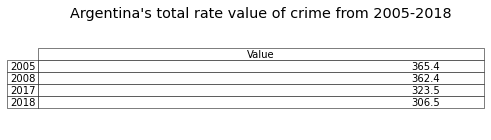

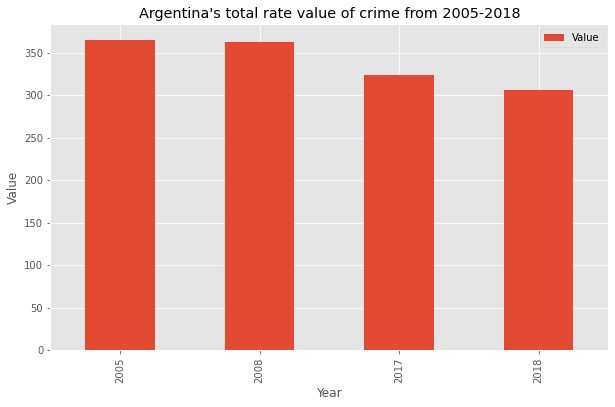

In [56]:
Barras_Total('Argentina',df)

In [57]:


def Barras_Homicides(Count, df):
    print(f'{Count}\'s Intentional homicide rates per 100,000')
    dfco2=df.loc[[Count]]
    dfas_co2 = dfco2[dfco2['Series'].str.contains("Intentional homicide rates per 100,000")]
    dfas_co2.set_index('Year', inplace=True)
    dfas_co2 = dfas_co2.drop(dfas_co2.columns[[0]], axis=1)
    
    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = dfas_co2.values,
          rowLabels = dfas_co2.index,
          colLabels = dfas_co2.columns,
          loc = "center"
         )
    ax.set_title(f'{Count}\'s Intentional homicide rates per 100,000 from 2005-2018' )

    ax.axis("off"); 
    dfas_co2.plot(kind='bar', color='green', figsize=(10, 6))
    plt.xlabel('Year') # add to x-label to the plot
    plt.ylabel('Value') # add y-label to the plot
    plt.title(f'{Count}\'s Intentional homicide rates per 100,000 from 2005-2018' ) # add title to the plot

    plt.show()

Mexico's Intentional homicide rates per 100,000


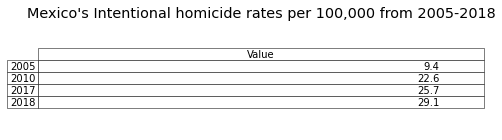

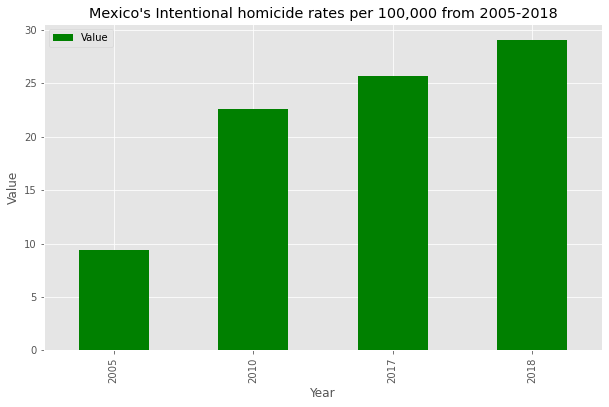

In [58]:
Barras_Homicides('Mexico', df)

In [59]:
def Barras_Kidnapping(Count, df):
    print(f'{Count}\'s Theft at the national level')
    dfco3=df.loc[[Count]]
    dfas_co3 = dfco3[dfco3['Series'].str.contains("Theft at the national level, rate per 100,000 population")]
    dfas_co3.set_index('Year', inplace=True)
    dfas_co3 = dfas_co3.drop(dfas_co3.columns[[0]], axis=1)

    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = dfas_co3.values,
          rowLabels = dfas_co3.index,
          colLabels = dfas_co3.columns,
          loc = "center"
         )
    ax.set_title(f'{Count}\'s Theft at the national level, rate per 100,000 population' )

    ax.axis("off"); 
    
   
    dfas_co3.plot(kind='bar', color='blue', figsize=(10, 6))
    plt.xlabel('Year') # add to x-label to the plot
    plt.ylabel('Value') # add y-label to the plot
    plt.title(f'{Count}\'s Theft at the national level, rate per 100,000 population' ) # add title to the plot

    plt.show()

Mexico's Theft at the national level


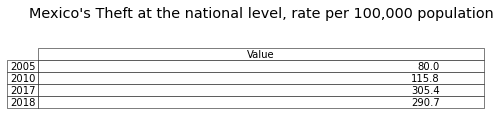

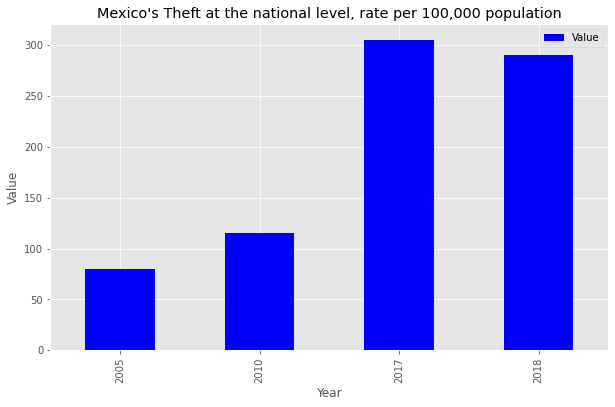

In [60]:
Barras_Kidnapping('Mexico',df)
      

In [63]:
def Barras_Sexual(Count, df):
    print(f'{Count}\'s Total Sexual Violence at the national level')
    dfco3=df.loc[[Count]]
    dfas_co3 = dfco3[dfco3['Series'].str.contains("Total Sexual Violence at the national level, rate per 100,000")]
    dfas_co3.set_index('Year', inplace=True)
    dfas_co3 = dfas_co3.drop(dfas_co3.columns[[0]], axis=1)
    
    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = dfas_co3.values,
          rowLabels = dfas_co3.index,
          colLabels = dfas_co3.columns,
          loc = "center"
         )
    ax.set_title(f'{Count}\'s Total Sexual Violence at the national level, rate per 100,000'  )

    ax.axis("off"); 
    

    
    
    dfas_co3.plot(kind='bar', color='orange', figsize=(10, 6))
    plt.xlabel('Year') # add to x-label to the plot
    plt.ylabel('Value') # add y-label to the plot
    plt.title(f'{Count}\'s Total Sexual Violence at the national level, rate per 100,000' ) # add title to the plot

    plt.show()

Mexico's Total Sexual Violence at the national level


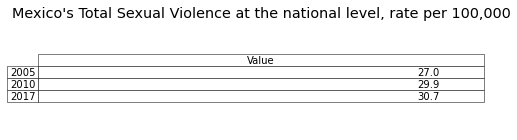

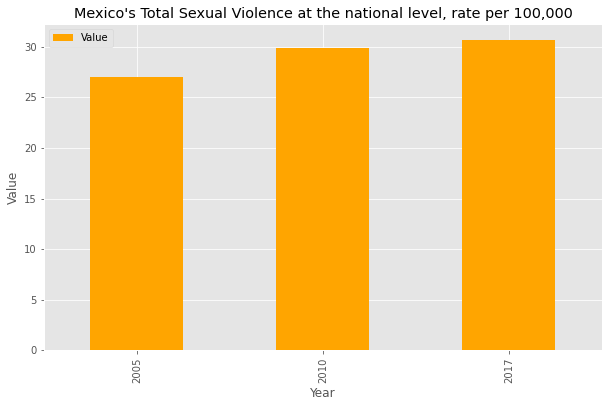

In [64]:
Barras_Sexual('Mexico',df)

In [65]:
def Barras_Assault(Count, df):
    print(f'{Count}\'s Assault rate per 100,000 population')
    dfco4=df.loc[[Count]]
    dfas_co4 = dfco4[dfco4['Series'].str.contains("Assault rate per 100,000 population")]
    dfas_co4.set_index('Year', inplace=True)
    dfas_co4 = dfas_co4.drop(dfas_co4.columns[[0]], axis=1)
    
    fig = plt.figure(figsize = (8, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = dfas_co4.values,
          rowLabels = dfas_co4.index,
          colLabels = dfas_co4.columns,
          loc = "center"
         )
    ax.set_title(f'{Count}\'s Assault rate per 100,000 population'   )

    ax.axis("off"); 

    dfas_co4.plot(kind='bar', color='pink', figsize=(10, 6))
    plt.xlabel('Year') # add to x-label to the plot
    plt.ylabel('Value') # add y-label to the plot
    plt.title(f'{Count}\'s Assault rate per 100,000 population' ) # add title to the plot

    plt.show()

Argentina's Assault rate per 100,000 population


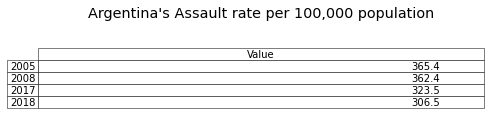

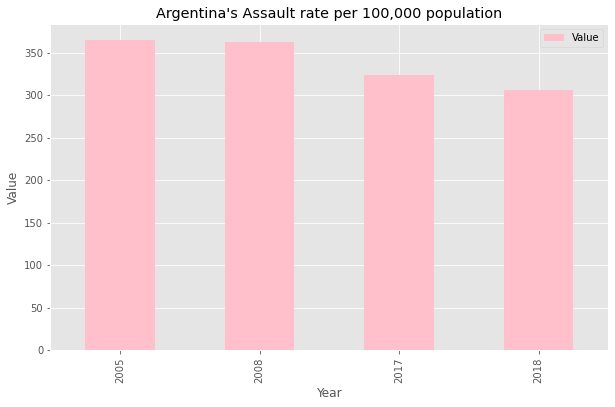

In [66]:
Barras_Assault('Argentina', df)

In [24]:
#vamos a hacer una lista con los nombres de los paises

In [67]:
list_countries=df.index.values.tolist()
list_countries = list(dict.fromkeys(list_countries))
print(list_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Cook Islands', 'Costa Rica', 'C�te d�Ivoire', 'Croatia', 'Cuba', 'Cura�ao', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',

# The function:country_input

Finally we get to the function. The   function named country_input()  asks the user: Are you ready to display the information? Enter Yes or No. If the user choose yes a list with names of a countries is diaplayed an then asks the user to write a the name of a country exactly as it is in the list. If the answer is different from yes the function would tell the user: start again and answer Yes. If the name is correct the function will print five tables and five bar graphs about the information of the choosen country.

In [82]:
def country_input():
    country = ''
    play_country = input('Are you ready to display the information? Enter Yes or No.')
    if play_country.lower()[0] == 'y':
        country_on=True
        print(list_countries)
    else:
        country_on=False
        print('start again and answer Yes ')
    while country_on:
        country = input('Choose a country exactly as it is written in the displayed list above: ')

        if country in list_countries:
            print(Barras_Total(country, df)),
            print(Barras_Assault(country, df)),
            print(Barras_Homicides(country, df)),
            print(Barras_Kidnapping(country,df)),
            print(Barras_Sexual(country, df))
            
            
        else:
            print(f'You misspelled {country}')
        break

 
    

Are you ready to display the information? Enter Yes or No.yes
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Cook Islands', 'Costa Rica', 'C�te d�Ivoire', 'Croatia', 'Cuba', 'Cura�ao', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Georgia', 'Ger

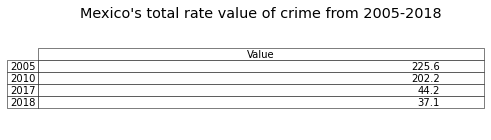

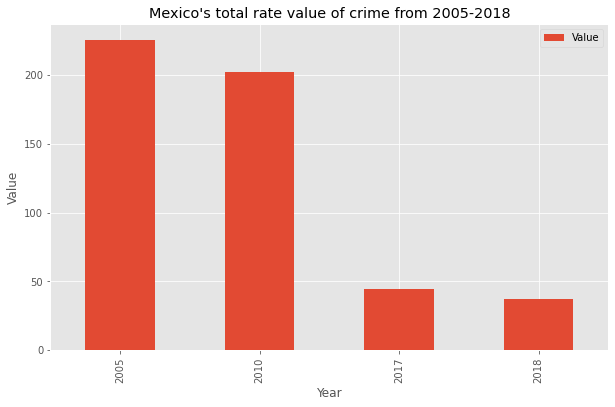

None
Mexico's Assault rate per 100,000 population


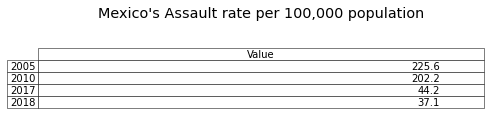

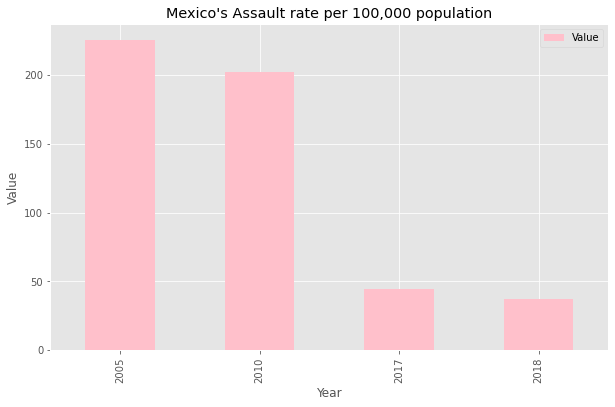

None
Mexico's Intentional homicide rates per 100,000


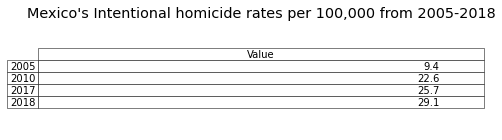

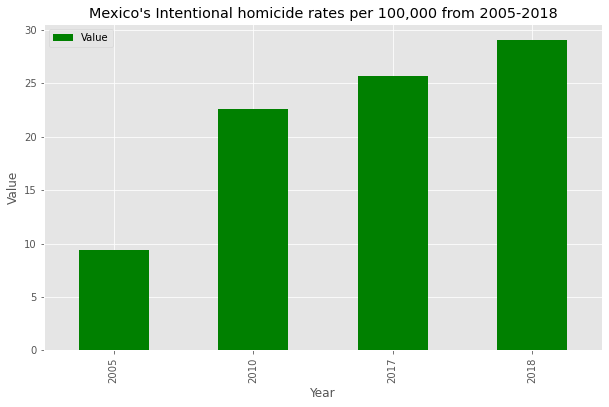

None
Mexico's Theft at the national level


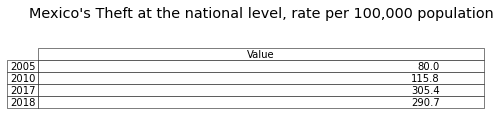

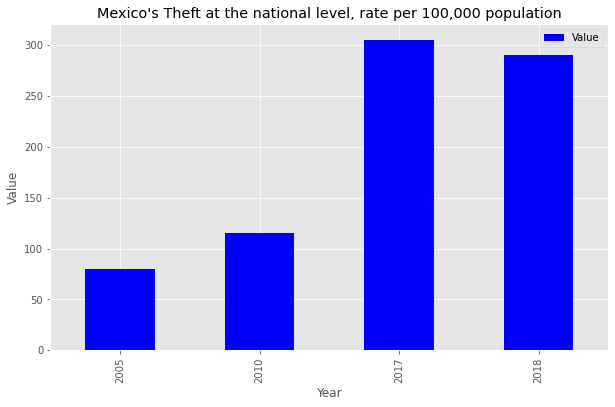

None
Mexico's Total Sexual Violence at the national level


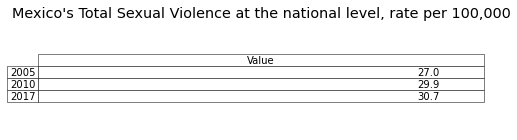

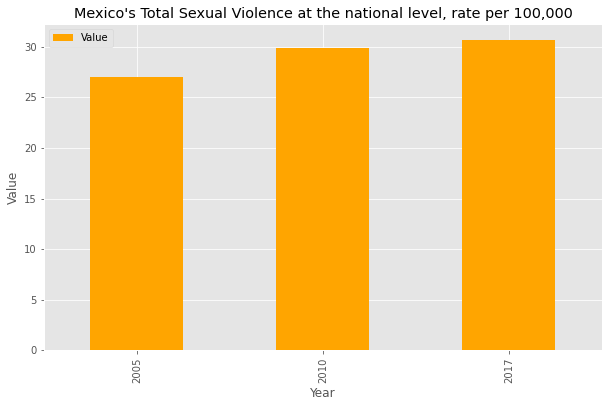

None


In [83]:
country_input()
